# Visualize Result of PHILHARMONIC Analysis

Lorem ipsum dolor...

In [1]:
from utils import load_cluster_json, plot_cluster_degree, parse_GO_map, repr_cluster, parse_GO_database
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx

In [2]:
# Initial Files
cluster_file_path = "/data/cb/samsl/philharmonic/20240913_philharmonic_pdam/20240913_pdam_clusters.functional.json"
network_file_path = "/data/cb/samsl/philharmonic/20240913_philharmonic_pdam/20240913_pdam_network.positive.tsv"
go_map_path = "/data/cb/samsl/philharmonic/20240913_philharmonic_pdam/20240913_pdam_GO_map.csv"

GO_SLIM = "/data/cb/samsl/philharmonic/20240913_philharmonic_pdam/goslim_generic.obo"

In [3]:
clusters = load_cluster_json(cluster_file_path)
full_G = nx.read_weighted_edgelist(network_file_path)
go_map = parse_GO_map(go_map_path)
go_database = parse_GO_database(GO_SLIM)

---

## Basic Network Statistics

In [4]:
label = ['Nodes','Edges','Degree (Med)','Degree (Avg)','Sparsity']
degrees = [i[1] for i in list(full_G.degree())]
value = [len(full_G.nodes), len(full_G.edges), np.median(degrees), np.mean(degrees), len(full_G.edges()) / len(full_G)**2]
df = pd.DataFrame([label,value]).T
df.columns = ['','Network']
df = df.set_index('')
df

,Network
,
Nodes,8515
Edges,229985
Degree (Med),22.0
Degree (Avg),54.01879
Sparsity,0.003172


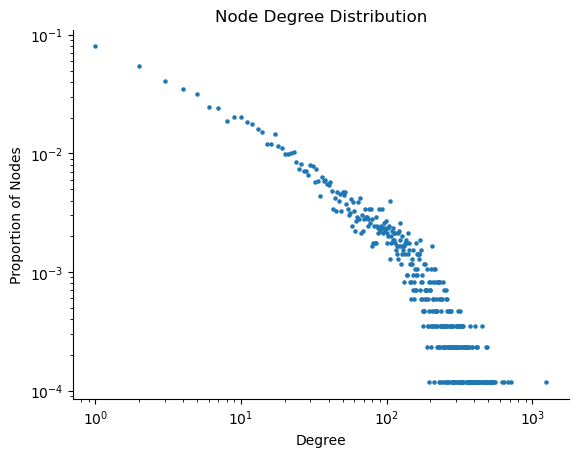

In [5]:
degreeDist = {}
for i in degrees:
    n = degreeDist.setdefault(i,0)
    degreeDist[i] = n + 1

plt.scatter(degreeDist.keys(), [i/len(full_G) for i in degreeDist.values()],s=5)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Degree")
plt.ylabel("Proportion of Nodes")
plt.title("Node Degree Distribution")
sns.despine()

---

## Basic Cluster Statistics

In [6]:
print(f"Number of clusters: {len(clusters)}")

Number of clusters: 532


/data/cb/samsl/mambaforge/envs/philharmonic/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/data/cb/samsl/mambaforge/envs/philharmonic/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


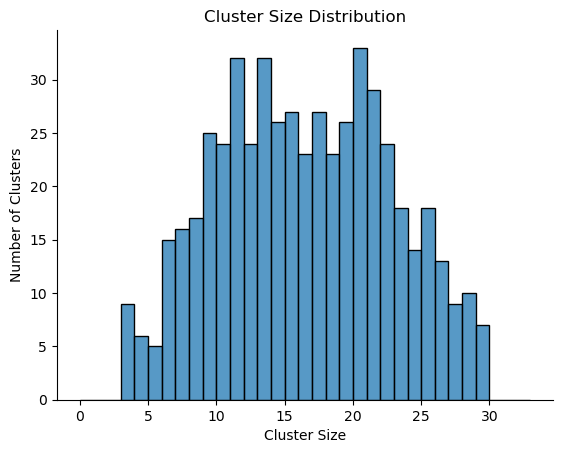

In [7]:
sizes = [len(i["members"]) for i in clusters.values()]
sns.histplot(sizes, bins = np.arange(0, max(sizes)+5, max(sizes) // 20))
plt.xlabel("Cluster Size")
plt.ylabel("Number of Clusters")
plt.title("Cluster Size Distribution")
sns.despine()
plt.show()

---

## View Individual Clusters

In [8]:
i = 5
k = list(clusters.keys())[i]

In [9]:
print(repr_cluster(clusters[k], go_database))

Cluster of 29 [pdam_00012542-RA, pdam_00012368-RA, pdam_00000161-RA, ...] (hash 1691406624616673394)
Triangles: 28
Max Degree: 10
Top Terms:
	('GO:0046872', 11)
	('GO:0000287', 8)
	('GO:0071318', 8)
	('GO:0004647', 8)
	('GO:0008253', 8)


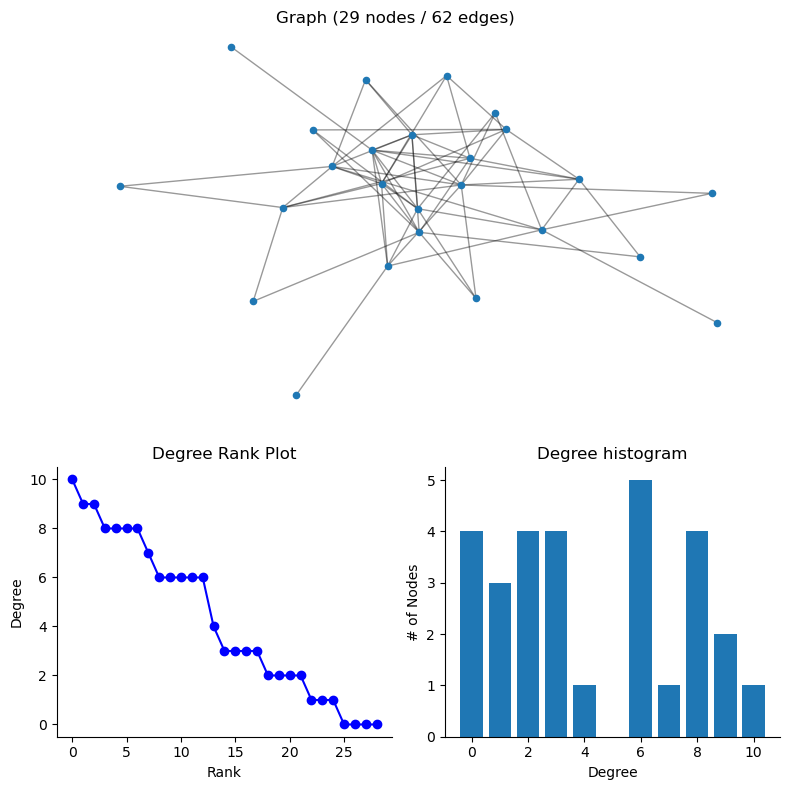

In [10]:
plot_cluster_degree(clusters[k], full_G)